# TASK 2

# 2.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df1=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
cont=[5,18,19]
cat=[]
for i in range(20):
    if i not in cont:
        cat.append(i)
cont_names=df1.columns[cont].values
cat_names=df1.columns[cat].values

In [2]:
y1=(df1['Churn']=='Yes').sum()
n=(df1['Churn']=='No').sum()
imp=SimpleImputer(missing_values=0,strategy="mean")
for i in cont:
    df1.iloc[:,i].fillna(0,inplace=True)
    df1.iloc[:,i].replace(' ',0,inplace=True)
    df1.iloc[:,i]=pd.to_numeric(df1.iloc[:,i])
categorical=df1.iloc[:,cat]
continuous=df1.iloc[:,cont]
arr_imp=imp.fit_transform(continuous)
continuous=pd.DataFrame(arr_imp,columns=cont_names)
target=df1.iloc[:,20]
X=categorical.join(continuous)
df2=X.join(target)
df3=df2.drop('customerID',axis=1)
X=df3.iloc[:,:19]
y=df3.iloc[:,19]
cat_names=df3.columns[:16].values
cont_names=df3.columns[16:19].values

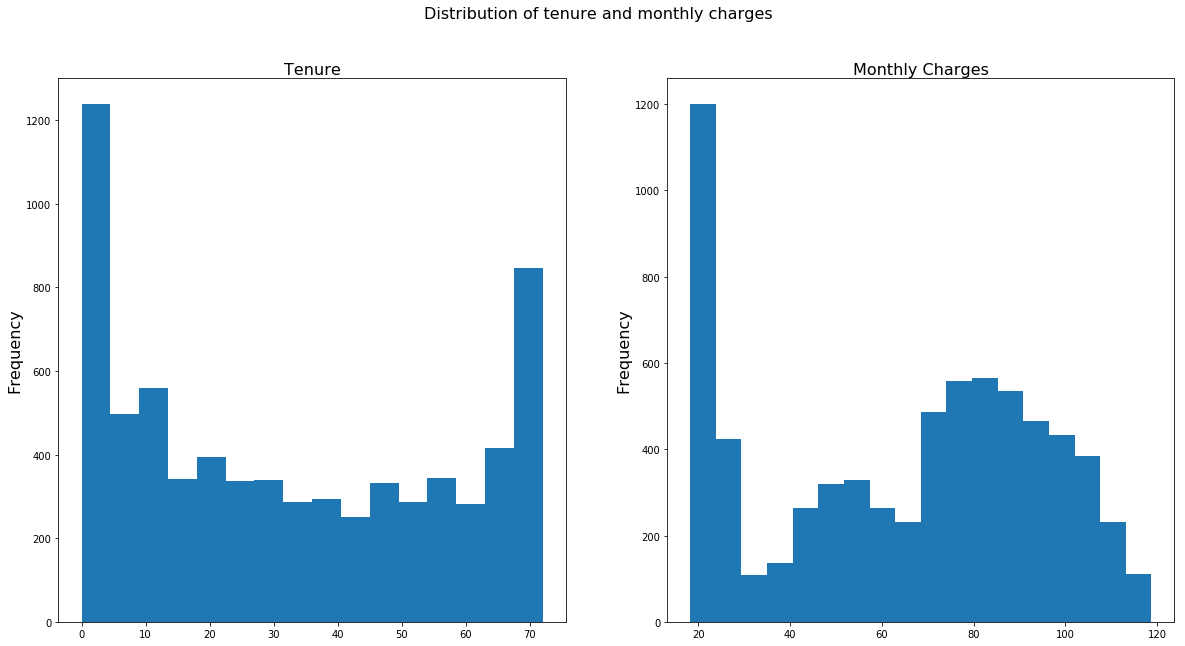

In [3]:
c=['Yes','No']
d=[y1,n]
fig,ax=plt.subplots(1,2,figsize=(20,10))
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
_=ax[0].hist(df1.iloc[:,5],bins='auto')
_=ax[0].set_xlabel("Tenure",fontsize=16)
_=ax[0].set_ylabel("Frequency",fontsize=16)
_=ax[0].xaxis.set_label_position('top')

_=ax[1].hist(df1.iloc[:,18],bins='auto')
_=ax[1].set_xlabel("Monthly Charges",fontsize=16)
_=ax[1].set_ylabel("Frequency",fontsize=16)
_=ax[1].xaxis.set_label_position('top')

_=plt.suptitle('Distribution of tenure and monthly charges',fontsize=16)

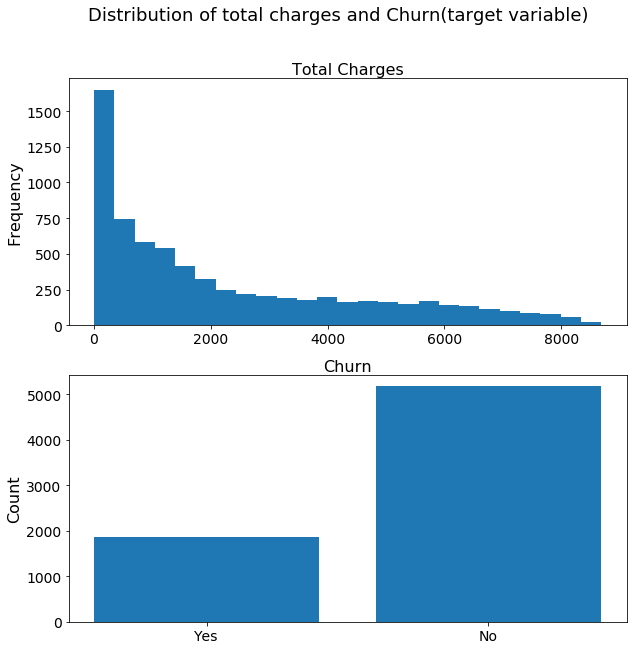

In [4]:
fig,ax=plt.subplots(2,1,figsize=(10,10))
ax[0].hist(df1.iloc[:,19],bins='auto')
ax[0].set_xlabel("Total Charges",fontsize=16)
ax[0].set_ylabel("Frequency",fontsize=16)
ax[0].xaxis.set_label_position('top')


ax[1].bar(c,d,align='center')
ax[1].set_xlabel("Churn",fontsize=16)
ax[1].set_ylabel("Count",fontsize=16)
ax[1].xaxis.set_label_position('top')

_=plt.suptitle("Distribution of total charges and Churn(target variable)",fontsize=18)

# 2.2

In [5]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.impute import SimpleImputer
X_train,X_test,y_train,y_test=train_test_split(X,y)
preprocess=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
            cat_names),(SimpleImputer(missing_values=0,strategy='mean'),
            cont_names))
model1=make_pipeline(preprocess,LogisticRegression(solver='sag',
                                                   max_iter=1000))
model2=make_pipeline(preprocess,LinearSVC(max_iter=1000))
model3=make_pipeline(preprocess,NearestCentroid())

score1 = cross_val_score(model1, X_train, y_train, cv=5)
mean_l=np.mean(score1)
score2 = cross_val_score(model2, X_train, y_train, cv=5)
mean_2=np.mean(score2)
score3 = cross_val_score(model3, X_train, y_train, cv=5)
mean_3=np.mean(score3)

In [6]:
print(score1)
print(score2)
print(score3)

[0.80794702 0.77010407 0.77483444 0.78219697 0.78862559]
[0.74456008 0.76726585 0.78902554 0.69223485 0.58957346]
[0.52601703 0.51087985 0.5307474  0.49337121 0.50616114]


In [ ]:
'''
We see that the score for nearest centroid is low. This may be due to the fact
that the input data is not standardised. Logistic regression has the highest 
validation scores while Nearest Centroid has the lowest score.
'''

In [7]:
preprocess=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
        cat_names),(make_pipeline(SimpleImputer(missing_values=0,strategy='mean'),
        StandardScaler()),cont_names))
model11=make_pipeline(preprocess,LogisticRegression(solver='sag',max_iter=1000))
model21=make_pipeline(preprocess,LinearSVC(max_iter=1000))
model31=make_pipeline(preprocess,NearestCentroid())

score11 = cross_val_score(model11, X_train, y_train, cv=5)
mean_l1=np.mean(score11)
score21 = cross_val_score(model21, X_train, y_train, cv=5)
mean_21=np.mean(score21)
score31 = cross_val_score(model31, X_train, y_train, cv=5)
mean_31=np.mean(score31)

In [8]:
print(score11)
print(score21)
print(score31)


[0.81173132 0.79280984 0.79754021 0.79924242 0.81137441]
[0.80321665 0.79186377 0.80416272 0.79734848 0.80758294]
[0.7473983  0.74645222 0.73320719 0.71590909 0.72417062]


In [ ]:
'''
The scores of all the models have improved after applying StandardScaler() on the
continuous features in the input. The Nearest Centroid has much better cross_val_scores
when the continuous features are standardised.
'''

# 2.3

In [24]:
from sklearn.model_selection import GridSearchCV
model12=make_pipeline(preprocess,LogisticRegression())
param_grid1 = {'logisticregression__C': np.logspace(-3, 2, 6) }
grid1=GridSearchCV(model12,param_grid1,cv=5,return_train_score=True)
grid1.fit(X_train,y_train)
print(grid1.best_score_)
grid1.cv_results_
print(grid1.best_params_)
d1=grid1.cv_results_['mean_train_score']
print(d1)

0.8051874290041651
{'logisticregression__C': 0.01}
[0.78824336 0.80656013 0.80480904 0.80575552 0.80580288 0.80551889]


In [25]:
model22=make_pipeline(preprocess,LinearSVC())
param_grid2 = {'linearsvc__C': np.logspace(-2, 2, 6) }
grid2 = GridSearchCV(model22,param_grid2, cv=5,return_train_score=True)
grid2.fit(X_train, y_train)
print(grid2.best_score_)
grid2.cv_results_
print(grid2.best_params_)
d2=grid2.cv_results_['mean_train_score']
print(d2)

0.8015903067020068
{'linearsvc__C': 0.01}
[0.80438311 0.80447769 0.80471441 0.8051404  0.79813555 0.68590668]


In [26]:
preprocess1=make_column_transformer((OneHotEncoder(handle_unknown='ignore',
           sparse=False),cat_names),(make_pipeline(SimpleImputer(missing_values=0,
           strategy='mean'),StandardScaler()),cont_names))
model32=make_pipeline(preprocess1,NearestCentroid())
param_grid3 = {'nearestcentroid__shrink_threshold': 
               [-0.2,-0.15,-0.1,-0.03,0,0.05,0.08,0.1,0.15,0.2] }
grid3 = GridSearchCV(model32,param_grid3, cv=5,return_train_score=True)
grid3.fit(X_train, y_train)
grid3.cv_results_
print(grid3.best_score_)
print(grid3.best_params_)
d3=grid3.cv_results_['mean_train_score']
print(d3)

0.7345702385460053
{'nearestcentroid__shrink_threshold': -0.2}
[0.7360846  0.7358479  0.73546919 0.73518524 0.73494857 0.73461723
 0.73471188 0.73480653 0.73456985 0.73438056]


In [27]:
print(grid1.cv_results_['mean_test_score'])
print(grid2.cv_results_['mean_test_score'])
print(grid3.cv_results_['mean_test_score'])

[0.78625521 0.80518743 0.80291556 0.8023476  0.80272624 0.80291556]
[0.80159031 0.8006437  0.80045437 0.80083302 0.7921242  0.69007952]
[0.73457024 0.73438092 0.73419159 0.73381295 0.73343431 0.73324498
 0.73305566 0.73305566 0.73305566 0.73305566]


In [ ]:
'''
Comparing the mean_test_scores of the above models with the cross_val_scores
obtained previously, both these values are almost equal. Thus there is
only a little improvement.
'''

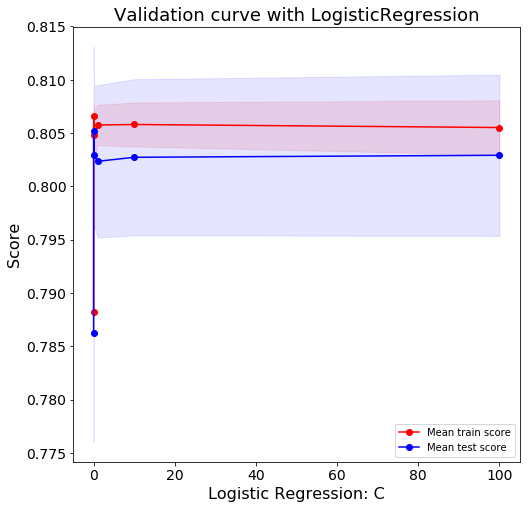

In [28]:
plt.figure(figsize=(8,8))
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
mean_score=d1
std_score=grid1.cv_results_['std_train_score']
mean_test_score=grid1.cv_results_['mean_test_score']
std_test_score=grid1.cv_results_['std_test_score']
std=np.std(d1)
_=plt.plot(param_grid1['logisticregression__C'],d1,marker='o',color="red",
           label="Mean train score")
_=plt.fill_between(param_grid1['logisticregression__C'],mean_score-std_score, 
                   mean_score+ std_score, alpha=0.1,color="r")
_=plt.plot(param_grid1['logisticregression__C'],mean_test_score,marker='o',
           color="blue",label="Mean test score")
_=plt.fill_between(param_grid1['logisticregression__C'],mean_test_score-std_test_score, 
            mean_test_score+ std_test_score,alpha=0.1,color="blue")
_=plt.xlabel("Logistic Regression: C",fontsize=16)
_=plt.ylabel("Score",fontsize=16)
_=plt.title("Validation curve with LogisticRegression",fontsize=18)
_=plt.legend(loc='lower right')

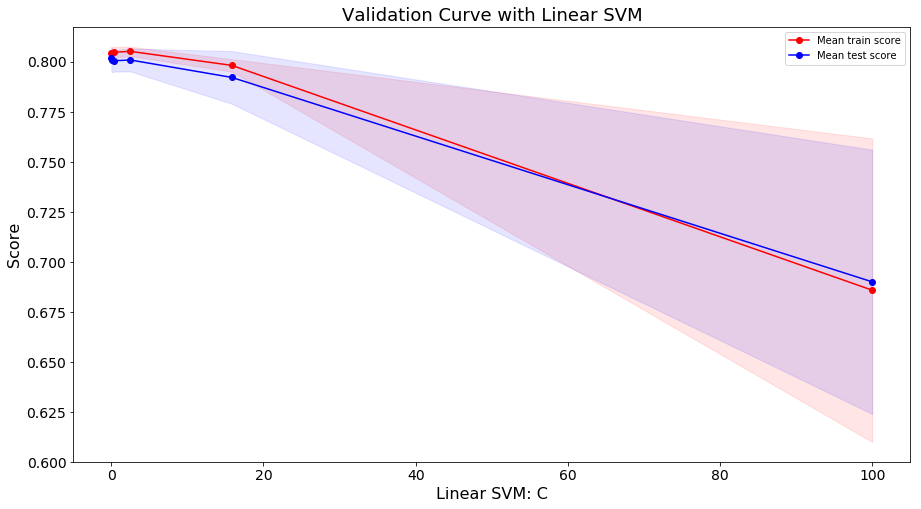

In [29]:
plt.figure(figsize=(15,8))
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
std_score=grid2.cv_results_['std_train_score']
mean_test_score=grid2.cv_results_['mean_test_score']
std_test_score=grid2.cv_results_['std_test_score']
_=plt.plot(param_grid2['linearsvc__C'],d2,marker='o',color='red',
           label='Mean train score')
_=plt.fill_between(param_grid2['linearsvc__C'],d2-std_score, 
                   d2+ std_score,alpha=0.1,color="r")
_=plt.xlabel("Linear SVM: C",fontsize=16)
_=plt.plot(param_grid2['linearsvc__C'],mean_test_score,marker='o',
           color='blue',label="Mean test score")
_=plt.fill_between(param_grid2['linearsvc__C'],mean_test_score-std_test_score,
                   mean_test_score+ std_test_score,alpha=0.1,color="blue")
_=plt.ylabel("Score",fontsize=16)
_=plt.title("Validation Curve with Linear SVM",fontsize=18)
_=plt.legend(loc='best')

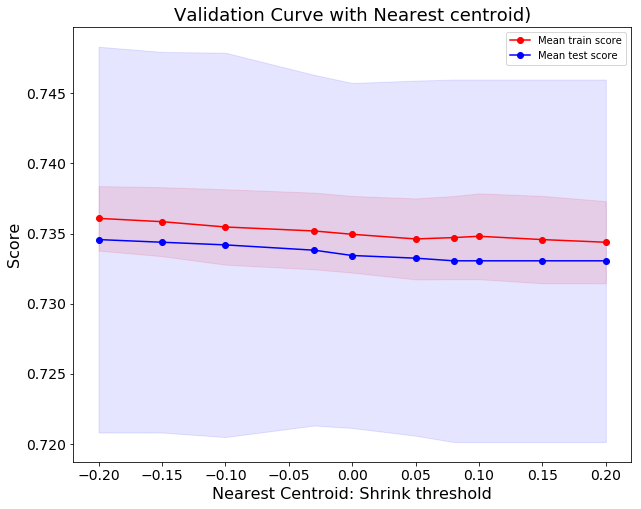

In [30]:
plt.figure(figsize=(10,8))
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
std_score=grid3.cv_results_['std_train_score']
mean_test_score=grid3.cv_results_['mean_test_score']
std_test_score=grid3.cv_results_['std_test_score']
_=plt.fill_between(param_grid3['nearestcentroid__shrink_threshold'],d3-std_score,
                   d3 + std_score,alpha=0.1,color="r")
_=plt.plot(param_grid3['nearestcentroid__shrink_threshold'],d3,marker='o',
           color="red",label="Mean train score")
_=plt.fill_between(param_grid3['nearestcentroid__shrink_threshold'],
                   mean_test_score-std_test_score,mean_test_score + std_test_score,
                   alpha=0.1,color="blue")
_=plt.plot(param_grid3['nearestcentroid__shrink_threshold'],mean_test_score,
           marker='o',color="blue",label="Mean test score")
_=plt.xlabel("Nearest Centroid: Shrink threshold",fontsize=16)
_=plt.ylabel("Score",fontsize=16)
_=plt.title("Validation Curve with Nearest centroid)",fontsize=18)
_=plt.legend(loc='best')

# 2.4

In [31]:
from sklearn.model_selection import KFold 
kfold = KFold(n_splits=5,shuffle=True)
grid11=GridSearchCV(model12,param_grid1,cv=kfold,return_train_score=True)
grid11.fit(X_train,y_train)
print(grid11.best_score_)
grid11.cv_results_
d11=grid11.cv_results_['mean_train_score']
print(grid11.best_params_)
print(d11)

0.8046194623248769
{'logisticregression__C': 0.01}
[0.78748585 0.80542407 0.80480877 0.80561344 0.80613404 0.80622868]


In [32]:
grid21 = GridSearchCV(model22,param_grid2, cv=kfold,return_train_score=True)
grid21.fit(X_train, y_train)
print(grid21.best_score_)
grid21.cv_results_
print(grid21.best_params_)
d21=grid21.cv_results_['mean_train_score']
print(d21)

0.8017796289284362
{'linearsvc__C': 2.5118864315095824}
[0.80556611 0.80504545 0.80499808 0.80485608 0.79827722 0.7072131 ]


In [33]:
grid31 = GridSearchCV(model32,param_grid3, cv=kfold,return_train_score=True)
grid31.fit(X_train, y_train)
grid31.cv_results_
print(grid31.best_score_)
print(grid31.best_params_)
d31=grid31.cv_results_['mean_train_score']
print(d31)

0.7345702385460053
{'nearestcentroid__shrink_threshold': -0.15}
[0.73575369 0.73537505 0.73513839 0.73471242 0.73485443 0.73461776
 0.73471244 0.73466511 0.73442843 0.73428643]


In [ ]:
'''
With shuffle, the parameter values found for linearsvc and nearest centroid 
change.The best parameter for logistic regression is still 0.01.
'''

In [34]:
kfold1 = KFold(n_splits=5,shuffle=True,random_state=42)
grid12=GridSearchCV(model12,param_grid1,cv=kfold1,return_train_score=True)
grid12.fit(X_train,y_train)
print(grid12.best_score_)
grid12.cv_results_
d12=grid12.cv_results_['mean_train_score']
print(grid12.best_params_)
print(d12)

0.8063233623627414
{'logisticregression__C': 0.01}
[0.78852731 0.80589733 0.80480872 0.80637059 0.80660726 0.80618126]


In [35]:
grid22 = GridSearchCV(model22,param_grid2, cv=kfold1,return_train_score=True)
grid22.fit(X_train, y_train)
print(grid22.best_score_)
grid22.cv_results_
print(grid22.best_params_)
d22=grid22.cv_results_['mean_train_score']
print(d22)

0.8051874290041651
{'linearsvc__C': 0.01}
[0.80400412 0.80461939 0.80457207 0.80480877 0.79401796 0.74162221]


In [36]:
grid32 = GridSearchCV(model32,param_grid3, cv=kfold1,return_train_score=True)
grid32.fit(X_train, y_train)
grid32.cv_results_
print(grid32.best_score_)
print(grid32.best_params_)
d32=grid32.cv_results_['mean_train_score']
print(d32)

0.7362741385838697
{'nearestcentroid__shrink_threshold': -0.2}
[0.73594287 0.73551689 0.73518557 0.7347596  0.73452293 0.73423893
 0.73428626 0.73428626 0.73409694 0.73395498]


In [ ]:
'''
On changing random seed of the shuffling, the parameters obtained are different as
compared to the ones obtained with random_state=None
'''

In [37]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,random_state=42)
grid13=GridSearchCV(model12,param_grid1,cv=kfold,return_train_score=True)
grid13.fit(X_train1,y_train1)
print(grid13.best_score_)
grid13.cv_results_
d13=grid13.cv_results_['mean_train_score']
print(grid13.best_params_)
print(d13)

0.8019689511548656
{'logisticregression__C': 100.0}
[0.78294188 0.80324686 0.80277359 0.8038148  0.80414616 0.80386221]


In [40]:
grid23 = GridSearchCV(model22,param_grid2, cv=kfold,return_train_score=True)
grid23.fit(X_train1, y_train1)
print(grid23.best_score_)
grid23.cv_results_
print(grid23.best_params_)
d23=grid23.cv_results_['mean_train_score']
print(d23)

0.8004543733434305
{'linearsvc__C': 2.5118864315095824}
[0.80286826 0.80315223 0.80357823 0.80357822 0.79875049 0.76197353]


In [41]:
grid33 = GridSearchCV(model32,param_grid3, cv=kfold,return_train_score=True)
grid33.fit(X_train1, y_train1)
grid33.cv_results_
print(grid33.best_score_)
print(grid33.best_params_)
d33=grid33.cv_results_['mean_train_score']
print(d33)

0.7273759939416887
{'nearestcentroid__shrink_threshold': -0.2}
[0.72936403 0.72926937 0.72889076 0.72874879 0.72860679 0.72855947
 0.72841748 0.72822815 0.72808616 0.72789682]


In [ ]:
'''
On changing the random_state of the split into train and test data on the 
train_test_split,the results change.Best param values for the models now are:
Logistic Regression : C=100
Linear SVM : C=2.5119
Nearest Centroid: shrink threshold= -0.2
'''

In [42]:
print(grid1.best_score_)
print(grid11.best_score_)
print(grid12.best_score_)
print(grid13.best_score_)

0.8051874290041651
0.8046194623248769
0.8063233623627414
0.8019689511548656


# 2.5

In [43]:
cate=X_train.iloc[:,:16]
ohe1=OneHotEncoder().fit(cate)
ce11=ohe1.transform(cate)
ce11.shape
x=ohe1.get_feature_names()

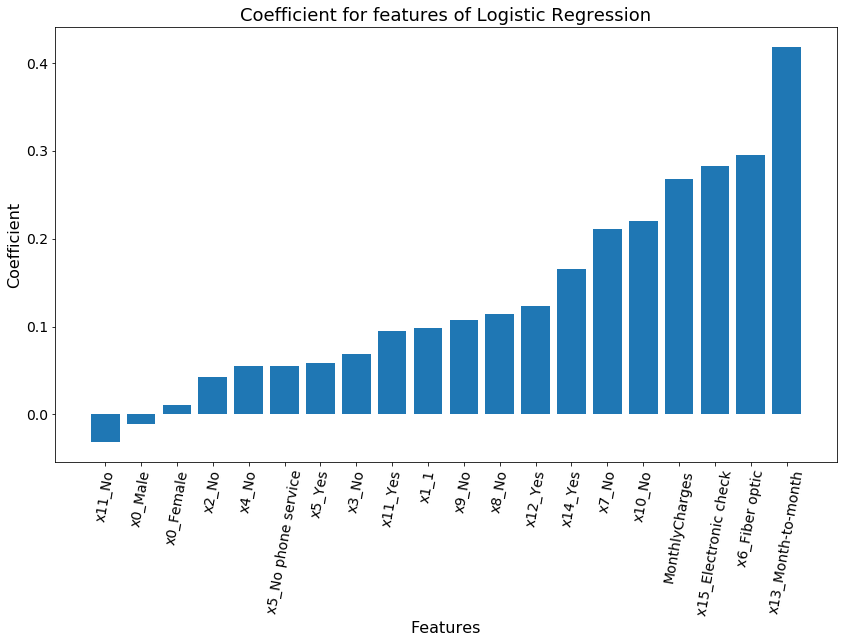

In [44]:
new_lr=LogisticRegression(solver='sag',
      C=grid12.best_params_['logisticregression__C'],max_iter=1000)
model_lr=make_pipeline(preprocess,new_lr)
lr=model_lr.fit(X_train,y_train)
l=lr.steps[1][1]
l=l.coef_
l=l[0]
ind=sorted(range(len(l)), key=lambda i: l[i])[-20:]
cat_names1=[None]*20
for i in range(20):
    y=ind[i]
    if y>42:
        cat_names1[i]=cont_names[y-43]
    else:
        cat_names1[i]=x[y]
fig,ax=plt.subplots(1,1,figsize=(14,8))
_=ax.bar(cat_names1,l[ind])
_=ax.set_xlabel('Features',fontsize=16)
_=ax.set_ylabel('Coefficient',fontsize=16)
_=ax.tick_params(axis='x',rotation=80)
_=plt.title('Coefficient for features of Logistic Regression',fontsize=18)


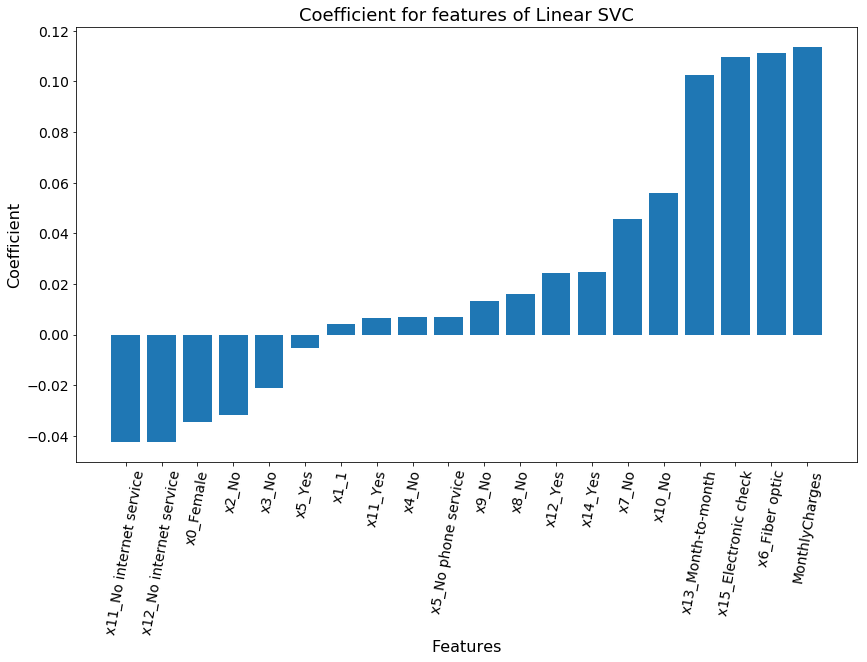

In [45]:
new_svc=LinearSVC(C=grid22.best_params_['linearsvc__C'],max_iter=1000)
model_svc=make_pipeline(preprocess,new_svc)
svc=model_svc.fit(X_train,y_train)
s=svc.steps[1][1]
s=s.coef_
s=s[0]
ind1=sorted(range(len(s)), key=lambda i: s[i])[-20:]
cat_names2=[None]*20
for i in range(20):
    y=ind1[i]
    if y>42:
        cat_names2[i]=cont_names[y-43]
    else:
        cat_names2[i]=x[y]
fig,ax=plt.subplots(1,1,figsize=(14,8))
_=ax.bar(cat_names2,s[ind1])
_=ax.set_xlabel('Features',fontsize=16)
_=ax.set_ylabel('Coefficient',fontsize=16)
_=ax.tick_params(axis='x',rotation=80)
_=plt.title('Coefficient for features of Linear SVC',fontsize=18)


In [ ]:
'''
Top20 features witht the highest coefficient values were plotted.
Top20 feautures for both these models are almost identical.
'''